# 01_서울시 구별 CCTV 현황 분석

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-준비하기" data-toc-modified-id="데이터-준비하기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 준비하기</a></span><ul class="toc-item"><li><span><a href="#서울시-구별-CCTV-현황-데이터-읽기" data-toc-modified-id="서울시-구별-CCTV-현황-데이터-읽기-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>서울시 구별 CCTV 현황 데이터 읽기</a></span></li><li><span><a href="#서울시-구별-인구-현황-데이터-읽기" data-toc-modified-id="서울시-구별-인구-현황-데이터-읽기-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>서울시 구별 인구 현황 데이터 읽기</a></span></li></ul></li><li><span><a href="#데이터-파악하기" data-toc-modified-id="데이터-파악하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 파악하기</a></span><ul class="toc-item"><li><span><a href="#CCTV-개수-파악하기" data-toc-modified-id="CCTV-개수-파악하기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>CCTV 개수 파악하기</a></span></li><li><span><a href="#서울시-인구-현황-정리" data-toc-modified-id="서울시-인구-현황-정리-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>서울시 인구 현황 정리</a></span></li></ul></li><li><span><a href="#데이터-합치기" data-toc-modified-id="데이터-합치기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 합치기</a></span><ul class="toc-item"><li><span><a href="#merge" data-toc-modified-id="merge-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>merge</a></span></li><li><span><a href="#del" data-toc-modified-id="del-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>del</a></span></li><li><span><a href="#set_index" data-toc-modified-id="set_index-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>set_index</a></span></li></ul></li><li><span><a href="#데이터간의-상관관계-알아보기" data-toc-modified-id="데이터간의-상관관계-알아보기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>데이터간의 상관관계 알아보기</a></span><ul class="toc-item"><li><span><a href="#상관관계-찾기" data-toc-modified-id="상관관계-찾기-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>상관관계 찾기</a></span></li><li><span><a href="#CCTV-개수와-인구수의-관계-더-알아보기" data-toc-modified-id="CCTV-개수와-인구수의-관계-더-알아보기-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CCTV 개수와 인구수의 관계 더 알아보기</a></span></li></ul></li><li><span><a href="#그래프로-분석하기" data-toc-modified-id="그래프로-분석하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>그래프로 분석하기</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>plot</a></span></li><li><span><a href="#scatter" data-toc-modified-id="scatter-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>scatter</a></span></li></ul></li></ul></div>

## 데이터 준비하기

### 서울시 구별 CCTV 현황 데이터 읽기

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
cctv_seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='UTF-8') # 인코딩 주의
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [55]:
# 데이터의 컬럼명 조회
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [56]:
# 컬럼 이름 변경해보기
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'}, inplace=True)
# DataFrame.rename(columns={DataFrame.columns[0] : 'abc', DataFrame.columns[1] : 'efg', ...})
# inplace=True 변경값을 데이터프레임에 적용

cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 서울시 구별 인구 현황 데이터 읽기

In [57]:
pop_seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding='UTF-8') # encoding 꼭 까먹지 않기!
pop_seoul.head()

# 데이터 수정이 필요하다.

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [58]:
# 수정해서 읽어오기
pop_seoul = pd.read_excel('../data/01. population_in_Seoul.xls', header=2, usecols='B,D,G,J,N', encoding='UTF-8')
# header 읽어오는 행 조정 
# header=2 : 세 번째 줄부터 읽어~
# usecols='B,D,G,J,N' 선택된 열만 읽어오기

pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [59]:
# 컬럼 이름 변경하기
pop_seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 데이터 파악하기

### CCTV 개수 파악하기

In [60]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [61]:
# cctv 전체 개수인 소계로 정렬하기
# cctv 가장 적게 설치된 곳 확인하기
cctv_seoul.sort_values(by='소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [62]:
# cctv가 가장 많이 설치된 곳 알아보기
# 소계 columns을 기준으로 내림차순 정렬
cctv_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [63]:
# 최근 3년간 cctv 증가율
# (2016 + 2015 + 2014) / 2013이전 * 100
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100

# 최근증가율 내림차순으로 정렬하기
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 서울시 인구 현황 정리

In [64]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [65]:
# 합계 행 삭제하기
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [66]:
# 중복데이터 검사하기
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [67]:
# NaN 데이터 확인하기
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [68]:
# NaN 행 삭제하기
pop_seoul.drop([26], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [69]:
# NaN 값 있는지 다시 확인
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [70]:
# 전체 인구로 구별 '외국인비율'과 '고령자비율' 계산하기
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [71]:
# 인구수를 기준으로 내림차순 정렬하기
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [72]:
# 외국인 기준으로 내림차순 정렬하기
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [73]:
# 외국인비율로 내림차순 정렬하기
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


* 외국인'수'와 인구수 대비 외국인'비율'은 엄연히 다른 척도 => 순위 다름

In [74]:
# 고령자 기준 내림차순 정렬하기
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [75]:
# 고령자비율 기준으로 내림차순 정렬하기
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 데이터 합치기

### merge

In [76]:
# 공통 컬럼인 '구별'로 merge
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### del

In [77]:
# 의미없는 컬럼 삭제하기
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### set_index

In [78]:
# 분석의 편의성을 위해서 index를 번호가 아닌 '구별' 컬럼으로 설정하기
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 상관계수

* 상관계수의 절대값이 클수록, 두 데이터가 관계가 있다고 볼 수 있다.
* 양(+), 음(-)의 상관관계 (-1 <= r <= 1)
* 상관계수의 절대값이
    - 0.1 이하 : 거의 관계가 없음
    - 0.1 ~ 0.3 : 약한 상관관계
    - 0.3 ~ 0.7 : 강한 상관관계
    - 0.7 ~ 1 : 매우 강한 상관관계
    
    
* numpy의 `corrcoef()` 사용
    - 결과를 대칭 행렬로 나타낸다.

## 데이터간의 상관관계 알아보기

### 상관관계 찾기

In [79]:
# CCTV 개수와 고령자비율 상관관계
np.corrcoef(data_result['소계'], data_result['고령자비율'])
# -0.28078554 # 약한 음의 상관관계


array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [80]:
# CCTV 개수와 외국인비율의 상관관계
np.corrcoef(data_result['소계'], data_result['외국인비율'])
# -0.13607433 # 큰 의미 없음

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [81]:
# CCTV 개수와 인구수의 상관관계
np.corrcoef(data_result['소계'], data_result['인구수'])
# 0.30634228 - 약한 양의 상관관계

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

### CCTV 개수와 인구수의 관계 더 알아보기

In [82]:
# CCTV 개수로 내림차순 정렬하기
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [83]:
# 인구수로 내림차순 정렬하기
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 그래프로 분석하기

### plot

In [84]:
# matplotlib 기본 폰트는 한글 폰트 지원 X, matplotlib의 폰트 변경해야함.
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [85]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


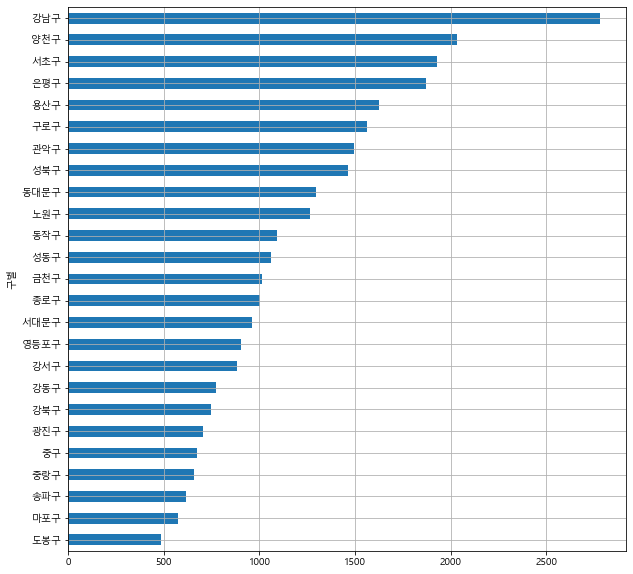

In [86]:
# pandas data뒤에 .plot 붙이면 그래프 그려줌!
# kind = 그래프종류, grid = 격자무늬, figsize = 출력 사이즈
# 그냥 출력하면 순서 뒤죽박죽이라 보기 어려우니, 내림차순 정렬해서 출력: .sort_values()
data_result['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))
plt.show()

* CCTV 개수 강남구가 월등함. 그 다음 양천구, 서초구, 은평구 순으로 많다.
* 도봉구 CCTV 개수가 가장 적음

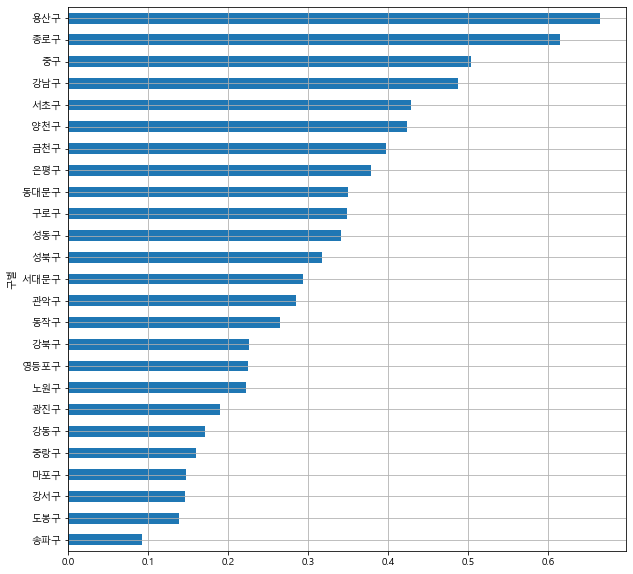

In [87]:
# 인구대비 CCTV 개수 비율 만들기
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

# 그래프 그려보기
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

* 인구 대비 CCTV 수는 용산구와 종로구가 월등히 높다.
* 송파구는 인구대비 CCTV 비율이 낮다.

### scatter

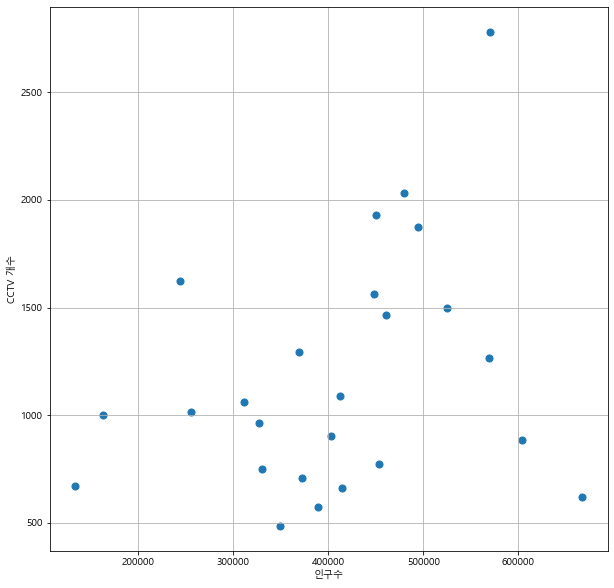

In [88]:
# scatter 함수 사용해서 산점도 그려보기
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

# 산점도에 직선 그리기

* `np.polyfit(x, y, n)` : y에 대한 x그래프를 그렸을 때, 오차가 가장 작은 n차 방정식의 계수를 저장한다.


* `np.poly1d()` : 다항식 생성함수(1, 2, 3, .. 차 다항식)
    - np.poly1d(입력 배열, 근 설정, 변수명)로 다항식을 생성합니다.
    - '입력 배열'을 다항식의 '계수'나 '근'으로 사용합니다.
    - 근 설정이 True라면 근으로 사용하며, False라면 계수로 사용합니다.(기본값 - False)
    - 변수명은 다항식의 변수의 이름을 설정합니다.(변수명 값을 입력하지 않는다면 x로 간주)
    
    
* `np.linspace(start, end, num-points)` : 시작값과 끝값을 균일하게 나눠주는 지점들을 생성
    - ex) c = np.linspace(0, 1, 6)
    - c
    - array([ 0., 0.2, 0.4, 0.6, 0.8, 1. ])

In [89]:
# 데이터를 대표하는 직선 그리기(CCTV와 인구수는 양의 상관관계가 있음)
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [90]:
f1 = np.poly1d(fp1)
# y축 데이터 
# poly1d : 숫자 1d임.
# fp1을 계수로 하는 1차 다항식의 함수를 만들어 줌.

fx = np.linspace(100000, 700000, 100)

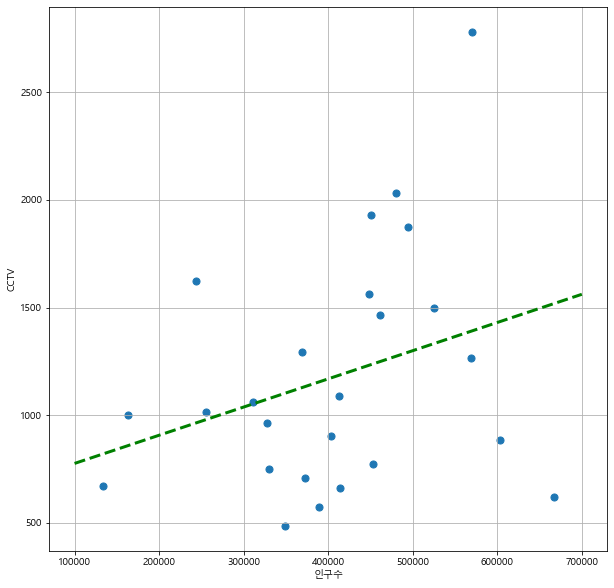

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

* 해당 1차 다항식은 '인구수가 300000일 때, CCTV는 1100개 정도여야 한다'는 개념을 나타낸다.


* 구 이름표시, 직선에서 멀리있는 점일수록 다른 색으로 나타나게 지정하고 싶다.
* 오차계산 필요

In [92]:
# 오차계산, 오차가 큰 순으로 정렬하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 오차 컬럼 생성하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수'])) # abs : 절대값 함수

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


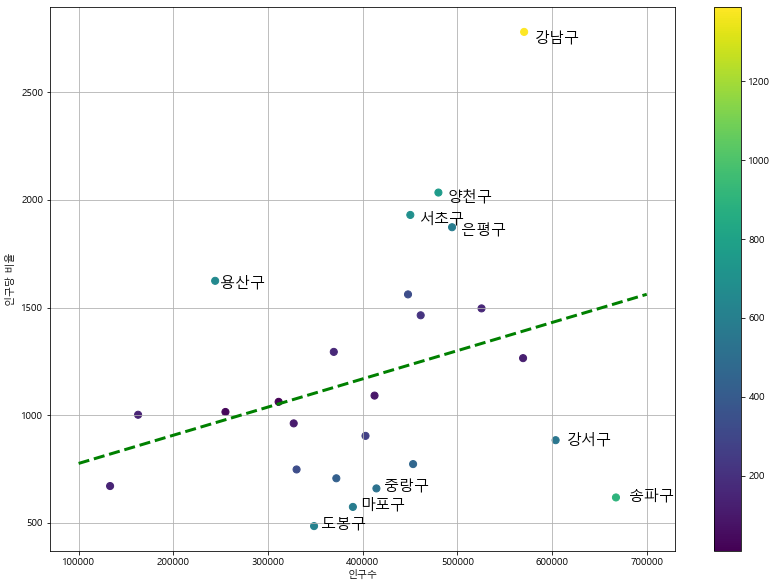

In [93]:
# 텍스트와 컬러맵 입히기
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
            c=data_result['오차'], s=50)    # c : color -> 오차 크기에따라 color가 달라진다
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color='g')

# plt.text(x,y,text) : x,y위치에 text를 출력
# 10개만 출력(top5, bottom5)
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()
plt.show()

* 직선을 기준으로 위쪽이 서울시 전체지역에서 일반적으로 CCTV가 많이 설치된 지역
    - 강남구가 인구대비 CCTV수가 월등히 많으며, 그 다음으로는 양천구, 서초구, 은평구, 용산구순으로 많았다.
    - 송파구가 인구대비 CCTV수가 현저히 적으며, 그 다음으로는 강서구, 중랑구, 마포구, 도봉구 순으로 적었다.

In [94]:
# 블로기 올리기용 크기 조절
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:70% !important;}</style>"))